In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv  # Bessel function of the first kind
from scipy.optimize import curve_fit


In [25]:
# modulation voltage

Vmod = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, \
3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]) 

# positive first

V0 = np.array([1., 1., 0.982759, 0.954407, 0.927954, 0.876877, 0.832184, 0.778443, \
0.723529, 0.654545, 0.595989, 0.520846, 0.452149, 0.386826, 0.330857, \
0.263253, 0.208876, 0.159878, 0.117714, 0.0807229, 0.0520118])

Vp1 = np.array([0., 0., 0.0123563, 0.0244985, 0.0409222, 0.060961, 0.083908, \
0.113174, 0.138235, 0.167273, 0.195415, 0.222961, 0.249857, 0.276048, \
0.294857, 0.312651, 0.328402, 0.334954, 0.338857, 0.337349, 0.33432])

Vp2 = np.array([0., 0., 0., 0., 0., 0., 0.00304598, 0.00467066, 0.00694118, \
0.0103636, 0.0141547, 0.0196375, 0.026361, 0.0343114, 0.0445714, \
0.0554217, 0.0674556, 0.0809726, 0.0948571, 0.110241, 0.126627])

Vp3 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.00241018, \
0.00331429, 0.00457831, 0.0060355, 0.00808511, 0.0104571, 0.0135542, \
0.0171006])

# negative next

V0 = V0

Vm1 = np.array([0., 0., 0.0110345, 0.0228571, 0.0397695, 0.0595195, 0.083908, \
0.113174, 0.138235, 0.167273, 0.195415, 0.222961, 0.249857, 0.276048, \
0.294857, 0.312651, 0.328402, 0.334954, 0.338857, 0.337349, 0.33432])

Vm2 = np.array([0., 0., 0., 0., 0., 0., 0.00258621, 0.0039521, 0.00623529, \
0.00951515, 0.0141547, 0.0190332, 0.026361, 0.0343114, 0.0445714, \
0.0554217, 0.0674556, 0.0801824, 0.0948571, 0.110241, 0.126627])

Vm3 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.00196108, \
0.00281714, 0.00403614, 0.00553254, 0.00753799, 0.0104571, 0.0128916, \
0.0171006])

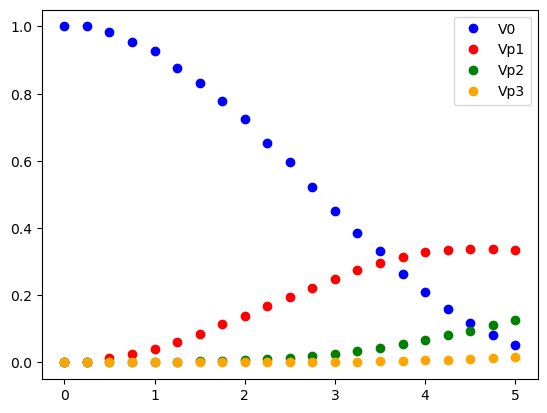

In [28]:
plt.plot(Vmod, V0, 'o', label='V0', color='blue')
plt.plot(Vmod, Vp1, 'o', label='Vp1', color='red')
plt.plot(Vmod, Vp2, 'o', label='Vp2', color='green')
plt.plot(Vmod, Vp3, 'o', label='Vp3', color='orange')
plt.legend()

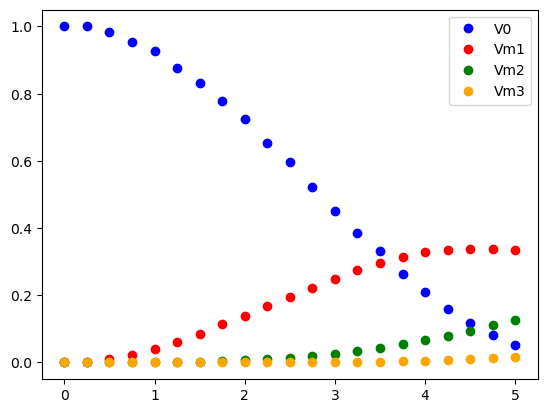

In [29]:
plt.plot(Vmod, V0, 'o', label='V0', color='blue')
plt.plot(Vmod, Vm1, 'o', label='Vm1', color='red')
plt.plot(Vmod, Vm2, 'o', label='Vm2', color='green')
plt.plot(Vmod, Vm3, 'o', label='Vm3', color='orange')
plt.legend()

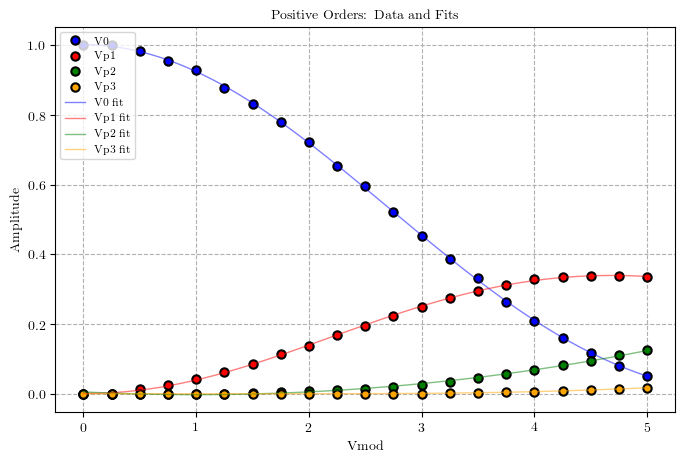

In [72]:
# Fit for zeroth order (V0)
def bessel_squared_zeroth_order(x, a, b, A, C):
    return A * (jv(0, a * x + b))**2 + C

# Generate x values for the fit curve
x_fit = np.linspace(0, 5, 100)

popt_V0, pcov_V0 = curve_fit(bessel_squared_zeroth_order, Vmod, V0, p0=[1,0,1.0,0])
V0_fit = bessel_squared_zeroth_order(x_fit, *popt_V0)

def bessel_squared_first_order(x, a, b, A, C):
    return A * (jv(1, a * x + b))**2 + C

popt_Vp1, pcov_Vp1 = curve_fit(bessel_squared_first_order, Vmod, Vp1)

# Generate fit curve for Vp1 using the optimized parameters
Vp1_fit = bessel_squared_first_order(x_fit, *popt_Vp1)

# Fit for second order (Vp2)
def bessel_squared_second_order(x, a, b, A, C):
    return A * (jv(2, a * x + b))**2 + C

popt_Vp2, pcov_Vp2 = curve_fit(bessel_squared_second_order, Vmod, Vp2)
Vp2_fit = bessel_squared_second_order(x_fit, *popt_Vp2)

# Fit for third order (Vp3)
def bessel_squared_third_order(x, a, b, A, C):
    return A * (jv(3, a * x + b))**2 + C

popt_Vp3, pcov_Vp3 = curve_fit(bessel_squared_third_order, Vmod, Vp3, p0=[1,0,1,0])
Vp3_fit = bessel_squared_third_order(x_fit, *popt_Vp3)

plt.figure(figsize=(8, 5))
plt.plot(Vmod, V0, 'o', label='V0', color='blue')
plt.plot(Vmod, Vp1, 'o', label='Vp1', color='red')
plt.plot(Vmod, Vp2, 'o', label='Vp2', color='green')
plt.plot(Vmod, Vp3, 'o', label='Vp3', color='orange')

plt.plot(x_fit, V0_fit, '-', label='V0 fit', color='blue', alpha=0.5)
plt.plot(x_fit, Vp1_fit, '-', label='Vp1 fit', color='red', alpha=0.5)
plt.plot(x_fit, Vp2_fit, '-', label='Vp2 fit', color='green', alpha=0.5)
plt.plot(x_fit, Vp3_fit, '-', label='Vp3 fit', color='orange', alpha=0.5)

plt.xlabel('Vmod')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Positive Orders: Data and Fits')
plt.show()

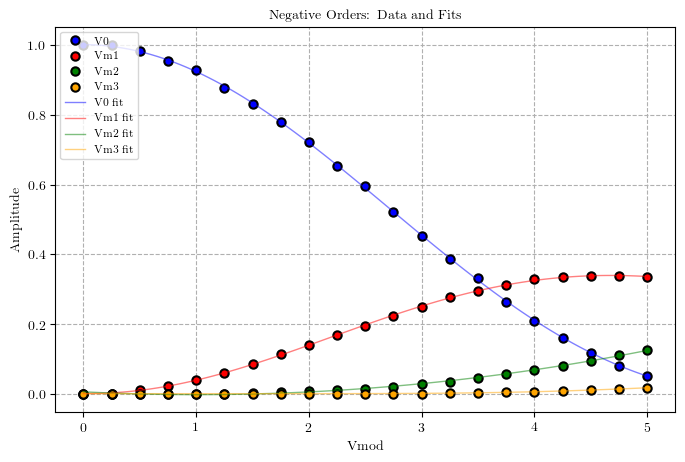

In [73]:
# Fit for negative first order (Vm1)
def bessel_squared_first_order_neg(x, a, b, A, C):
    return A * (jv(1, a * x + b))**2 + C

popt_Vm1, pcov_Vm1 = curve_fit(bessel_squared_first_order_neg, Vmod, Vm1)
Vm1_fit = bessel_squared_first_order_neg(x_fit, *popt_Vm1)

# Fit for negative second order (Vm2)
def bessel_squared_second_order_neg(x, a, b, A, C):
    return A * (jv(2, a * x + b))**2 + C

popt_Vm2, pcov_Vm2 = curve_fit(bessel_squared_second_order_neg, Vmod, Vm2)
Vm2_fit = bessel_squared_second_order_neg(x_fit, *popt_Vm2)

# Fit for negative third order (Vm3)
def bessel_squared_third_order_neg(x, a, b, A, C):
    return A * (jv(3, a * x + b))**2 + C

popt_Vm3, pcov_Vm3 = curve_fit(bessel_squared_third_order_neg, Vmod, Vm3, p0=[1,0,1,0])
Vm3_fit = bessel_squared_third_order_neg(x_fit, *popt_Vm3)

plt.figure(figsize=(8, 5))
plt.plot(Vmod, V0, 'o', label='V0', color='blue')
plt.plot(Vmod, Vm1, 'o', label='Vm1', color='red')
plt.plot(Vmod, Vm2, 'o', label='Vm2', color='green')
plt.plot(Vmod, Vm3, 'o', label='Vm3', color='orange')

plt.plot(x_fit, bessel_squared_zeroth_order(x_fit, *popt_V0), '-', label='V0 fit', color='blue', alpha=0.5)
plt.plot(x_fit, Vm1_fit, '-', label='Vm1 fit', color='red', alpha=0.5)
plt.plot(x_fit, Vm2_fit, '-', label='Vm2 fit', color='green', alpha=0.5)
plt.plot(x_fit, Vm3_fit, '-', label='Vm3 fit', color='orange', alpha=0.5)

plt.xlabel('Vmod')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Negative Orders: Data and Fits')
plt.show()

# 250524 Nice plot for thesis

In [87]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 2 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

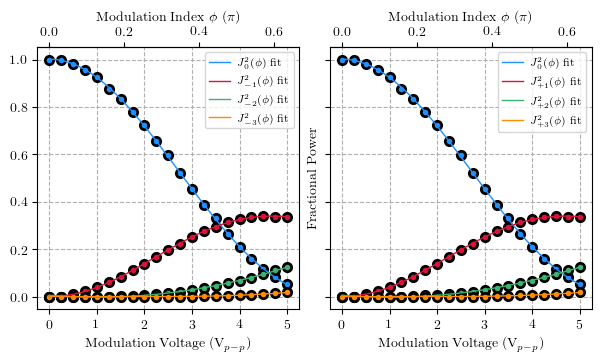

In [96]:
fig, (ax2, ax1) = plt.subplots(1, 2, sharey=True, constrained_layout=True)

ax1.plot(Vmod, V0, 'o', color='dodgerblue')
ax1.plot(Vmod, Vp1, 'o', color='crimson')
ax1.plot(Vmod, Vp2, 'o', color='mediumseagreen')
ax1.plot(Vmod, Vp3, 'o', color='darkorange')
ax1.plot(x_fit, V0_fit, '-', color='dodgerblue', label=r'$J_0^2(\phi)$ fit')
ax1.plot(x_fit, Vp1_fit, '-', color='crimson', label=r'$J_{+1}^2(\phi)$ fit')
ax1.plot(x_fit, Vp2_fit, '-', color='mediumseagreen', label=r'$J_{+2}^2(\phi)$ fit')
ax1.plot(x_fit, Vp3_fit, '-', color='darkorange', label=r'$J_{+3}^2(\phi)$ fit')

# Define the transformation functions for the secondary x-axis
def Vmod_to_ModIndex(x):
    return x / (np.pi*2.51)
def ModIndex_to_Vmod(x):
    return x * (np.pi*2.51)
# Apply the transformation functions for the secondary axis
ax1_top = ax1.secondary_xaxis('top', functions=(Vmod_to_ModIndex, ModIndex_to_Vmod))
ax1_top.set_xlabel(r'Modulation Index $\phi$ ($\pi$)')
ax1.set_xlabel(r'Modulation Voltage (V$_{p-p}$)')
ax1.set_ylabel('Fractional Power')
ax1.legend(loc='upper right')

ax2.plot(Vmod, V0, 'o', color='dodgerblue')
ax2.plot(Vmod, Vm1, 'o', color='crimson')
ax2.plot(Vmod, Vm2, 'o', color='mediumseagreen')
ax2.plot(Vmod, Vm3, 'o', color='darkorange')
ax2.plot(x_fit, bessel_squared_zeroth_order(x_fit, *popt_V0), '-', color='dodgerblue', label=r'$J_0^2(\phi)$ fit')
ax2.plot(x_fit, Vm1_fit, '-', color='crimson', label=r'$J_{-1}^2(\phi)$ fit')
ax2.plot(x_fit, Vm2_fit, '-', color='mediumseagreen', label=r'$J_{-2}^2(\phi)$ fit')
ax2.plot(x_fit, Vm3_fit, '-', color='darkorange', label=r'$J_{-3}^2(\phi)$ fit')
# Apply the transformation functions for the secondary axis
ax2_top = ax2.secondary_xaxis('top', functions=(Vmod_to_ModIndex, ModIndex_to_Vmod))
ax2_top.set_xlabel(r'Modulation Index $\phi$ ($\pi$)')
ax2.set_xlabel(r'Modulation Voltage (V$_{p-p}$)')
ax2.legend(loc='upper right')

plt.savefig('250524 EOMModulationDepthPlotPositiveNegativeOrders.pdf', dpi=300)